# Задание
Модификация [классического переноса стиля Gatys et al. (2016) Image Style Transfer Using Convolutional Neural Networks](https://www.cv-foundation.org/openaccess/content_cvpr_2016/html/Gatys_Image_Style_Transfer_CVPR_2016_paper.html)

Задание необходимо сдать до 1 ноября 23:30. 
12 баллов.

Как известно, нейросетевая стилизация способна накладывать сложные стили, но ценой искажения исходного изображения. Ваша задача - реализовать метод, который бы накладывал стиль максимально выраженно, но при этом сохраняя существенные детали изображения за счет сохранения контуров. 

Вам необходимо:

1. **Реализовать стилевую функцию потерь (2 балла)**, вычисляющую нецентрированную матрицу Грамма (попарные ковариации между каналами, не забудьте поделить на height*width тензора) и квадрат нормы Фробениуса для расхождения матриц Грамма. Это 2 блока "YOUR CODE HERE" в коде ниже.  

1. **Добавить стандартное сохранение контуров (4 балла)** Контуры извлекаются фильтром Собеля, примененных к изображению после пулинга (default: 2x2, но можете взять другой если будет лучше работать) независимо по каждому из R,G,B каналов. После чего в ф-цию потерь стилизации добавляется расхождение карты контуров по квадрату метрику Фробениуса для текущей стилизации и контента. Подобрать коэффициенты при стилевой, контентоной и контурной ф-ции потерь, чтобы контуры стали более выраженными, но при этом не слишком сильно пострадала стилизация, а итоговый результат был такой же по силе стилизации, как первый (классический) подход.

1. **Улучшить алгоритм учета контуров для стилизации (6 баллов)** 

Фильтр Собеля учитывает все цветовые перепады на всем изображении, и получается, что  условие сохранение границ-сильное условие, которое во многом ограничивает полноту наложения стиля. В этой части вам предстоит с одной стороны сохранить **значимые границы**, а с другой - пренебречь незначимые, чтобы **полнее накладывать стиль**. Помимо постпроцессинга контуров можно модифицировать сам алгоритм их извлечения или функцию потерь по их учету.

В зачет этого задания пойдет **любая ваша идея**, приводящая к заметному улучшению стилизации (стиль накладывается полнее без потери значимых границ) на репрезентативном наборе фотографий.

Мои варианты:
1. придумать более адекватную ф-цию потерь сохранения контуров при стилизации
1. предобработка контента, например, используя [edge preserving smoothing](https://en.wikipedia.org/wiki/Edge-preserving_smoothing) перед применением стандартного фильтра. 
1. сохранение контуров другим более подходящим алгоритмом. Учитывайте, что толщина контуров может тоже оказаться важна, тонкие однопиксельные контуры могут не заработать. Это может быть адаптация unsupervised алгоритма, например, фильтра Canny для решаемой задачи.
1. использование supervised алгоритмов извлечения контуров, лучше решающих поставленную задачу.
1. выделение основных контуров по полной карте контуров через [математическую морфологию]([https://en.wikipedia.org/wiki/Mathematical_morphology), подавляя слабо выраженные, и усиливая сильно выраженные.
1. усиливать контуры на лицах, ослаблять в остальных местах, но чтобы не возникало артефактов от bounding box.
1. сильнее соответствие контуров на фигурах людей по результатам сегментации 

Чтобы все не делали одно и то же, разрешено не больше 5 студентов на каждый подход.
Разбивка студентов по подходам осуществляется [здесь](https://docs.google.com/document/d/16175pQZefs4rFaHW0TyjFvu7WtSbtJ-ymhf6w4kP9Lg/edit?usp=sharing). Впишите вашу ФИО под подходом, который вы будете реализовывать. Если будете использовать свой подход, допишите его. Если у вас комбинация существующих подходов, то можно отнести себя к любому из них.


Важна не сложность алгоритма и не объем кода, а то, что предложенный подход приводит к заметному улучшению поставленной задачи на репрезентативном наборе фото (стиль накладывается полнее без потери значимых границ). 


## Оценивание

**Наличие вашего кода, реализующего все задания**
В процессе решения вы можете использовать любые готовые алгоритмы и решения со ссылкой на первоисточник. Если код есть в первоисточнике и запускался отдельно, то его можно не вставлять. Обученные модели не присылать. Решения в github и других открытых источниках не выкладывать - присылайте ipynb или zip архив в anytask.

В конце ноутбука нужно **визуализировать стиль** (можно взять один из стилей [отсюда](https://yadi.sk/d/Yn-9mk4NAsSAKw?w=1), но можно любой другой, чтобы проблема сохранения границ была заметна, например немного размытый или с крупными пятнами) и **привести таблицу 17x4** на всю ширину экрана, в каждой строке 4 изображения: 
* контент
* стилизация стандартным алгоритмом 
* стилизация стандартным алгоритмом+сохранение границ фильтром Собеля (подберите размер пулинга и силу учета границ, чтобы вклад контуров был заметен)
* стилизация вашим улучшенным алгоритмом учета контуров

Изображения 17 контентов нужно брать [отсюда](https://yadi.sk/d/Yn-9mk4NAsSAKw?w=1). Использование собственных контентов разрешено только после после согласования со мной @VictorKitov (например, если ваш алгоритм будет решать специфический подкласс проблемных случаев).

Далее нужно привести таблицу 17x3: **контент, контуры стандартным и модифицированным методом**.

**Оценивание в первую очередь будет идти по указанным таблицам**, насколько явным будет преимущество предложенным алгоритмом. Для всех алгоритмов **параметры должны быть зафиксированны**, а не подбираться индивидуально для каждого изображения. Веса при ф-циях потерь стиля, контента и учета контуров нужно подобрать так, чтобы сравнение 3 алгоритмов производилось при одинаковой силе стилизации (простое включение контурной ф-ции потерь ослабит стилизацию, и это нужно подкорректировать увеличением веса при ф-ции потерь стиля), т.е. **визуальная сила стилизации для 3х сравниваемых алгоритмов должна была одинаковой**.

**Описание на качественном уровне вашей модификации** задания 3 с общей идеей и алгоритмом в виде описания каждого шага на качественном уровне с формулами, рисунки приветствуются. Стандартный алгоритм стилизации описывать не нужно. Подобное описание необходимо для полного бала за 3 задание.




In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# !pip uninstall torch and torchvision
# !pip install torch

In [2]:
%pylab inline
import time
import os 
image_dir = os.getcwd() + '/gdrive/My Drive/DL/HW3/Images/'
model_dir = os.getcwd() + '/gdrive/My Drive/DL/HW3/Models/'

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import torchvision
from torchvision import transforms

from PIL import Image
from collections import OrderedDict
import PIL  
  


Populating the interactive namespace from numpy and matplotlib


### Инициализация сети VGG и функций обработки изображений.

In [3]:
#vgg definition that conveniently let's you grab the outputs from any layer
class VGG(nn.Module):
    def __init__(self, pool='max'):
        super(VGG, self).__init__()
        #vgg modules
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        if pool == 'max':
            self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        elif pool == 'avg':
            self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool3 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool4 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool5 = nn.AvgPool2d(kernel_size=2, stride=2)
            
    def forward(self, x, out_keys):
        out = {}
        out['r11'] = F.relu(self.conv1_1(x))
        out['r12'] = F.relu(self.conv1_2(out['r11']))
        out['p1'] = self.pool1(out['r12'])
        out['r21'] = F.relu(self.conv2_1(out['p1']))
        out['r22'] = F.relu(self.conv2_2(out['r21']))
        out['p2'] = self.pool2(out['r22'])
        out['r31'] = F.relu(self.conv3_1(out['p2']))
        out['r32'] = F.relu(self.conv3_2(out['r31']))
        out['r33'] = F.relu(self.conv3_3(out['r32']))
        out['r34'] = F.relu(self.conv3_4(out['r33']))
        out['p3'] = self.pool3(out['r34'])
        out['r41'] = F.relu(self.conv4_1(out['p3']))
        out['r42'] = F.relu(self.conv4_2(out['r41']))
        out['r43'] = F.relu(self.conv4_3(out['r42']))
        out['r44'] = F.relu(self.conv4_4(out['r43']))
        out['p4'] = self.pool4(out['r44'])
        out['r51'] = F.relu(self.conv5_1(out['p4']))
        out['r52'] = F.relu(self.conv5_2(out['r51']))
        out['r53'] = F.relu(self.conv5_3(out['r52']))
        out['r54'] = F.relu(self.conv5_4(out['r53']))
        out['p5'] = self.pool5(out['r54'])
        return [out[key] for key in out_keys]

In [4]:
#get network
vgg = VGG()
vgg.load_state_dict(torch.load(model_dir + 'vgg_conv.pth'))
for param in vgg.parameters():
    param.requires_grad = False
if torch.cuda.is_available():
    vgg.cuda()

In [5]:
# pre and post processing for images
img_size = 600 
prep = transforms.Compose([transforms.Scale(img_size),
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to BGR
                           transforms.Normalize(mean=[0.40760392, 0.45795686, 0.48501961], #subtract imagenet mean
                                                std=[1,1,1]),
                           transforms.Lambda(lambda x: x.mul_(255)),
                          ])
postpa = transforms.Compose([transforms.Lambda(lambda x: x.mul_(1./255)),
                           transforms.Normalize(mean=[-0.40760392, -0.45795686, -0.48501961], #add imagenet mean
                                                std=[1,1,1]),
                           transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to RGB
                           ])
postpb = transforms.Compose([transforms.ToPILImage()])
def postp(tensor): # to clip results in the range [0,1]
    t = postpa(tensor)
    t[t>1] = 1    
    t[t<0] = 0
    img = postpb(t)
    return img

postpa_mask = transforms.Compose([transforms.Lambda(lambda x: x.mul_(1./255))])
postpb_mask = transforms.Compose([transforms.ToPILImage()])
def postp_mask(tensor): # to clip results in the range [0,1]
    t = postpa_mask(tensor)
    t[t>1] = 1    
    t[t<0] = 0
    img = postpb_mask(t)
    return img


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:280: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [6]:
#load images, ordered as [style_image, content_image]
def img_load(style, content, img_dirs):
  img_names = [style, content]
  imgs = [Image.open(img_dirs[i] + name) for i,name in enumerate(img_names)]
  imgs_torch = [prep(img) for img in imgs]
  if torch.cuda.is_available():
      imgs_torch = [Variable(img.unsqueeze(0).cuda()) for img in imgs_torch]
  else:
      imgs_torch = [Variable(img.unsqueeze(0)) for img in imgs_torch]
  style_image, content_image = imgs_torch

  # opt_img = Variable(torch.randn(content_image.size()).type_as(content_image.data), requires_grad=True) #random init
  opt_img = Variable(content_image.data.clone(), requires_grad=True)
  return style_image, content_image, opt_img

In [7]:
def run_transfer(style_image, content_image, opt_img, 
                 content_loss_w, style_loss_w, 
                 edge_loss_w = None, pool_k = None, max_iter = 200, canny_mode=False,
                 canny = {'gaus_k':3, 'gaus_sigma':1.4, 
                          'low_threshold':None, 'high_threshold':None, 
                          'part':0.25, 'hyst':True}, save=False, path_for_converted=None, path_for_mask=None):
  beta = style_loss_w
  alfa = content_loss_w
  gamma = edge_loss_w
  mode = 'mixed'
  #define layers, loss functions, weights and compute optimization targets
  style_layers = ['r11','r21','r31','r41', 'r51'] 
  content_layers = ['r42']
  loss_layers = style_layers + content_layers
  loss_fns = [GramMSELoss()] * len(style_layers) + [nn.MSELoss()] * len(content_layers)
  if edge_loss_w != None:
    loss_fns += [SobelLoss()]

  if torch.cuda.is_available():
    loss_fns = [loss_fn.cuda() for loss_fn in loss_fns]
        
  #these are good weights settings:
  style_weights = [beta * 1e3/n for n in [64,128,256,512,512]]
  content_weights = [alfa * 1e0]
  weights = style_weights + content_weights 
  if edge_loss_w != None:
    edge_weight = [gamma * 1e0]
    weights += edge_weight

  #compute optimization targets
  style_targets = [A.detach() for A in vgg(style_image, style_layers)]
  content_targets = [A.detach() for A in vgg(content_image, content_layers)]
  targets = style_targets + content_targets
  if edge_loss_w != None:
    if pool_k:
      edge_target = [PoolSobel()(content_image, pool_k, mode).cuda()]
    elif canny_mode:
      edge_target = [CannyFilter()(content_image, gaus_k = canny['gaus_k'], gaus_sigma = canny['gaus_sigma'], 
                    low_threshold=canny['low_threshold'], high_threshold=canny['high_threshold'], 
                    part = canny['part'], hyst=canny['hyst'])]
    else:
      print('Choose the Sobel pool_k or caccy_mode = True')
    targets += edge_target

  #run style transfer
  max_iter = max_iter
  show_iter = 50
  optimizer = optim.LBFGS([opt_img]);
  n_iter=[0]

  while n_iter[0] <= max_iter:

      def closure():
          optimizer.zero_grad()
          out = vgg(opt_img, loss_layers)
          if edge_loss_w != None:
            if pool_k:
              out += [PoolSobel()(opt_img, pool_k, mode)]
            elif canny_mode:
              out += [CannyFilter()(opt_img, gaus_k = canny['gaus_k'], gaus_sigma = canny['gaus_sigma'], 
                    low_threshold=canny['low_threshold'], high_threshold=canny['high_threshold'], 
                    part = canny['part'], hyst=canny['hyst'])]
          layer_losses = [weights[a] * loss_fns[a](A, targets[a]) for a,A in enumerate(out)] 
          # print(layer_losses[-1])
          loss = sum(layer_losses)
          # print(loss)
          loss.backward()
          n_iter[0]+=1
          #print loss
          if n_iter[0]%show_iter == (show_iter-1):
              print('Iteration: %d, loss: %f'%(n_iter[0]+1, loss.item()))
  #             print([loss_layers[li] + ': ' +  str(l.data[0]) for li,l in enumerate(layer_losses)]) #loss of each layer
          return loss
      
      optimizer.step(closure)
      
  #display result
  out_img = postp(opt_img.data[0].cpu().squeeze())
  imshow(out_img)
  if save:
    out = out_img.save(path_for_converted)
    if edge_loss_w:
      # print(edge_target[0].shape)
      mask = postp_mask(edge_target[0].data[0].cpu().squeeze())
      # imshow(mask)
      mask = mask.save(path_for_mask)
  gcf().set_size_inches(10,10)

### №1 Реализовать стилевую функцию потерь (2 балла), вычисляющую нецентрированную матрицу Грамма (попарные ковариации между каналами, не забудьте поделить на height*width тензора) и квадрат нормы Фробениуса для расхождения матриц Грамма. Это 2 блока "YOUR CODE HERE" в коде ниже.

In [8]:
# gram matrix and loss
class GramMatrix(nn.Module):
    def forward(self, input):
        sh_1, sh_2, sh_3, sh_4 = input.size()
        features = input.view(sh_1 * sh_2, sh_3 * sh_4)
        G = torch.mm(features, features.t())
        G = G.div(sh_3 * sh_4)
        return G

class GramMSELoss(nn.Module):
    def forward(self, input, target):
        diff = GramMatrix()(input) - GramMatrix()(target)
        out = torch.sum(torch.pow(diff, 2) / (target.size()[1] ** 2))
        return out

In [ ]:
# #display images
# for img in imgs:
#     imshow(img);show()

In [40]:
style_image, content_image, opt_img = img_load('water-103817.jpg',  'pexels-arnie-chou-1557843.jpg', [image_dir+'styles/', image_dir+'contents/'])

Iteration: 50, loss: 6217334.000000
Iteration: 100, loss: 3080445.500000
Iteration: 150, loss: 1473723.125000


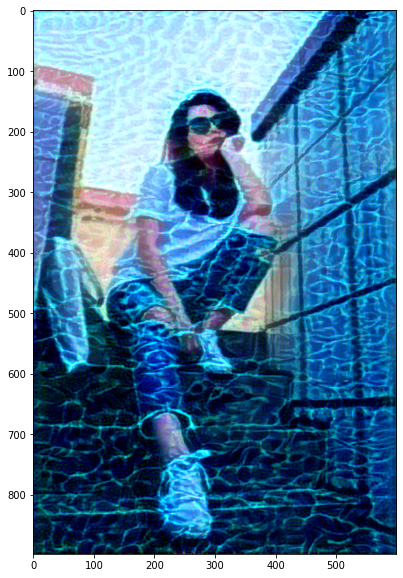

In [41]:
run_transfer(style_image, content_image, opt_img, 
             1e-3, 1e-3, max_iter = 150, save=True, 
             path_for_converted = (image_dir+'Converted_imgs/test.jpg'), 
             path_for_mask='Converted_imgs/test1.jpg')

### **№ 2. Добавить стандартное сохранение контуров (4 балла)**

 Контуры извлекаются фильтром Собеля, примененных к изображению после пулинга (default: 2x2, но можете взять другой если будет лучше работать) независимо по каждому из R,G,B каналов. После чего в ф-цию потерь стилизации добавляется расхождение карты контуров по квадрату метрику Фробениуса для текущей стилизации и контента. Подобрать коэффициенты при стилевой, контентоной и контурной ф-ции потерь, чтобы контуры стали более выраженными, но при этом не слишком сильно пострадала стилизация, а итоговый результат был такой же по силе стилизации, как первый (классический) подход.

In [13]:
class PoolSobel(nn.Module):
  def forward(self, inp, pool_k, mode, m=1):
    '''
    input - image for processing
    pool_k - kernel size for pooling
    mode - either horisontal, vertical or use both of it : 'H', 'V', 'mixed'
    threshold - if mixed, then use it as condition for detection of edge
    '''
    # Poolling
    pool = torch.nn.AvgPool2d(pool_k, stride = 1, padding = 0)
    inp = pool(inp)

    # Horizontal 
    sobel = np.array([[-1, -2, -1], 
                      [0, 0, 0], 
                      [1, 2, 1]])
    # lap_1 = np.array([[0, -1, 0],
    #                   [-1, 4, -1],
    #                   [0, -1, 0]])
    # lap_2 = np.array([[-1, -1, -1],
    #                   [-1, 8, -1],
    #                   [-1, -1, -1]])
    channels = inp.size(1)
    sobel_kernel_H = torch.tensor(sobel, dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    sobel_kernel_V = torch.tensor(sobel.T, dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    if mode == 'H':
      sobel_h_out = F.conv2d(inp, sobel_kernel_H, stride=1, padding=0, groups=inp.size(1))
      return sobel_h_out
    if mode == 'V':
      sobel_v_out = F.conv2d(inp, sobel_kernel_V, stride=1, padding=0, groups=inp.size(1))
      return sobel_v_out
    if mode == 'mixed':
      sobel_h_out = F.conv2d(inp, sobel_kernel_H, stride=1, padding=0, groups=inp.size(1))
      sobel_v_out = F.conv2d(inp, sobel_kernel_V, stride=1, padding=0, groups=inp.size(1))
      # torch.atan(sobel_v_out / sobel_h_out)
      out =  torch.sqrt(torch.pow(sobel_h_out, 2) + torch.pow(sobel_v_out, 2) + m)
      return out


class SobelLoss(nn.Module):
  def forward(self, input, target):
    res = torch.pow((input - target).sum(dim = 1), 2).sum()
    return res

**Использование фильтра Собеля одного из видов: горизонтального или вертикального не давало хороших результатов, поэтому было решено их объединить путем возведения в квадрат и извлечения квадратного корня поэлементно, для каждого из слоев R, G, B. Для численной стабилизации к сумме квадратов добавлен параметр m = 1 по-умолчанию.**

In [47]:
style_image, content_image, opt_img = img_load('water-103817.jpg',  'pexels-arnie-chou-1557843.jpg', [image_dir+'styles/', image_dir+'contents/'])

Iteration: 50, loss: 1451898624.000000
Iteration: 100, loss: 808699648.000000
Iteration: 150, loss: 424205952.000000


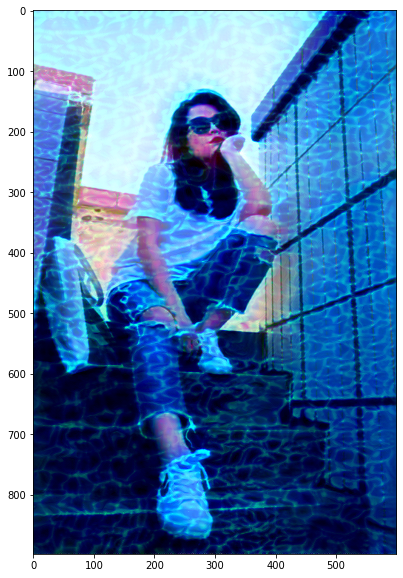

In [48]:
run_transfer(style_image, content_image, opt_img, 
                 1e-3, 1e-1, edge_loss_w = 0.1, pool_k = 2, max_iter = 150,
             save = True, path_for_converted = image_dir + 'test4.jpg', path_for_mask= image_dir + 'test5.jpg')

Видим результат, стиль накладывается полнее, а контуры остаются более четкими.

###  **№3.Улучшить алгоритм учета контуров для стилизации (6 баллов)**

В качестве метода, который должен послужить улучшенным алгоритмом выделения контуров было решено взять метод детекции границ Кэнни, с небольшими видоизмененными этапами.

In [24]:
# Implemetation of Canny filter https://habr.com/ru/post/114589/
# part of code gets from https://towardsdatascience.com/implement-canny-edge-detection-from-scratch-with-pytorch-a1cccfa58bed 
# https://tech.unifa-e.com/entry/2020/01/30/100451
import cv2
class CannyFilter(nn.Module):
  def forward(self, inp, gaus_k = 3, gaus_sigma = 1.4, 
               low_threshold=None, high_threshold=None, 
              part = 0.25, hyst=True):
    # First step - The Gaussian kernel
    channels = inp.size(1)
    if gaus_k:
      # print('Gauss on')
      gauss_kernel = self.CrtGauFiltKern(gaus_k,gaus_sigma)
      gauss_kernel = torch.tensor(gauss_kernel, dtype=torch.float32).unsqueeze(0).expand(channels, 1, gauss_kernel.shape[0], gauss_kernel.shape[1]).cuda()
      inp = F.conv2d(inp, gauss_kernel, stride=1, padding=0, groups=inp.size(1))

    # Second step - Gradient magnitude detection
    # print('Sobel on')
    sobel = np.array([[-1, -2, -1], 
                      [0, 0, 0], 
                      [1, 2, 1]])
    
    sobel_H = torch.tensor(sobel, dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    sobel_V = torch.tensor(sobel.T, dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
    h_sob_out = F.conv2d(inp, sobel_H, stride=1, padding=0, groups=inp.size(1))
    v_sob_out = F.conv2d(inp, sobel_V, stride=1, padding=0, groups=inp.size(1))
    inp =  torch.sqrt(torch.pow(h_sob_out, 2) + torch.pow(v_sob_out, 2) + 1).sum(dim=1).unsqueeze(0)

    # Step 3 - non max suppression
    filters = self.get_thin_kernels()
    channels = inp.size(1)
    dict_of_kern = {}
    for i, f in enumerate(filters):
      kernel = torch.tensor(f, dtype=torch.float32).unsqueeze(0).expand(channels, 1, 3, 3).cuda()
      dict_of_kern[i] = F.conv2d(inp, kernel, stride=1, padding=1, groups=inp.size(1))
    
    directional = torch.cat(list(dict_of_kern.values()), dim = 1)
    
    # norm = (dict_of_kern[0] - dict_of_kern[0].min()) / (dict_of_kern[0].max() - dict_of_kern[0].min())
    # smth = norm.max(torch.Tensor([0.6]).cuda()) - torch.Tensor([0.6]).cuda()
    # prep = (smth > 0).type(torch.uint8)


    # get indices of positive and negative directions
    grad_orientation = torch.atan(v_sob_out / (h_sob_out+0.00000001))
    grad_orientation = grad_orientation.sum(dim=1).unsqueeze(0) / 3 
    grad_orientation = grad_orientation * (360 / np.pi) + 180 # convert to degree
    grad_orientation = torch.round(grad_orientation / 45) * 45 

    positive_idx = (grad_orientation / 45) % 8
    negative_idx = ((grad_orientation / 45) + 4) % 8

    # non maximum suppression direction by direction


    for pos_i in range(4):
      neg_i = pos_i + 4
      # get the oriented grad for the angle
      is_oriented_i = (positive_idx == pos_i) * 1
      is_oriented_i = is_oriented_i + (positive_idx == neg_i) * 1
      pos_directional = directional[:, pos_i]
      neg_directional = directional[:, neg_i]
      selected_direction = torch.stack([pos_directional, neg_directional])

      # get the local maximum pixels for the angle
      is_max = selected_direction.min(dim=0)[0] > 0
      is_max = torch.unsqueeze(is_max, dim=1)

      # apply non maximum suppression
      to_remove = (is_max == 0) * 1 * (is_oriented_i) > 0
      inp[to_remove] = 0.0
 
    # inp = inp.div(inp.max())
    #The last step threshold and hysteresis  
    hysteresis = np.ones((3, 3)) + 0.25
  
    hyst_conv = nn.Conv2d(in_channels=1,
                          out_channels=1,
                          kernel_size=3,
                              padding=1,
                             bias=False)
    hyst_conv.weight[:] = torch.from_numpy(hysteresis)
    hyst_conv.cuda()

    if low_threshold:
      low_threshold = inp.max() * part
      if high_threshold:
        high_threshold = inp.max() * (1 - part) 
    
    if low_threshold:
      low = (inp > low_threshold) * 1
      inp = inp * low
      
      if high_threshold:
        high = (inp > high_threshold) * 1
        # get black/gray/white only
        b_g_w_mask =  low * 0.5 + high * 0.5

        if hyst:
        # get weaks and check if they are high or not
          weak = (b_g_w_mask == 0.5) * 1
          weak_is_high = (hyst_conv(b_g_w_mask) > 1) * weak
          b_g_w_mask = high + weak_is_high

        inp = inp * b_g_w_mask
    return inp
    
  # Gaussian kernel
  def G_gen(self, x,y,sigma):
    return 1/(2*np.pi*sigma*sigma)*np.exp(-(x*x + y*y)/(2*sigma*sigma))

  def CrtGauFiltKern(self, size,sigma):
    shift = np.floor(size/2)
    M = np.zeros((size,size))
    for i in range(size):
      for j in range(size):
        M[i][j] = self.G_gen(j - shift, i - shift, sigma)
    return M

  # Non max suppression kernel
  def get_thin_kernels(self, start=0, end=360, step=45):
    k_thin = 3  # actual size of the directional kernel
    # increase for a while to avoid interpolation when rotating
    k_increased = k_thin + 2

    # get 0° angle directional kernel
    thin_kernel_0 = np.zeros((k_increased, k_increased))
    thin_kernel_0[k_increased // 2, k_increased // 2] = 1
    thin_kernel_0[k_increased // 2, k_increased // 2 + 1:] = -1

    # rotate the 0° angle directional kernel to get the other ones
    thin_kernels = []
    for angle in range(start, end, step):
      (h, w) = thin_kernel_0.shape
      # get the center to not rotate around the (0, 0) coord point
      center = (w // 2, h // 2)
      # apply rotation
      rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
      kernel_angle_increased = cv2.warpAffine(thin_kernel_0, rotation_matrix, (w, h), cv2.INTER_NEAREST)

      # get the k=3 kerne
      kernel_angle = kernel_angle_increased[1:-1, 1:-1]
      is_diag = (abs(kernel_angle) == 1)      # because of the interpolation
      kernel_angle = kernel_angle * is_diag   # because of the interpolation
      thin_kernels.append(kernel_angle)
    return np.array(thin_kernels)

In [62]:
style_image, content_image, opt_img = img_load('water-103817.jpg',  'pexels-arnie-chou-1557843.jpg', [image_dir + 'styles/', image_dir + 'contents/'])

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/module.py:390: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  if param.grad is not None:


Iteration: 50, loss: 1604781696.000000
Iteration: 100, loss: 1441182720.000000
Iteration: 150, loss: 1955203072.000000


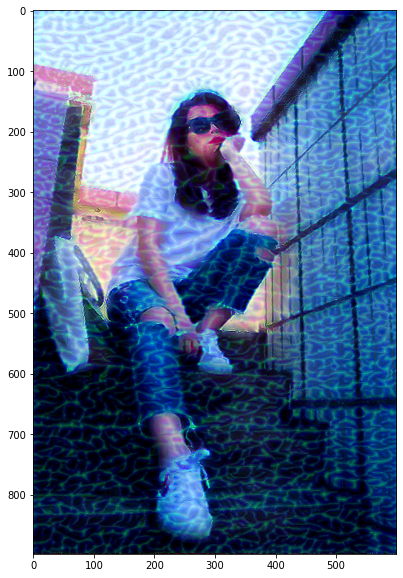

In [63]:
# the best one in canny mode
run_transfer(style_image, content_image, opt_img, 
             1, 1e-2, edge_loss_w = 1,
             pool_k = None, max_iter = 150, canny_mode=True,
             canny = {'gaus_k':5, 'gaus_sigma':1, 
                      'low_threshold':True, 'high_threshold':False, 
                      'part':0.1, 'hyst':True},
             save=True, 
             path_for_converted = (image_dir+'Converted_imgs/testFalse.jpg'), 
             path_for_mask=image_dir + 'Converted_imgs/testFalse4.jpg')

In [64]:
from os import listdir
from os.path import isfile, join
# Gets all content files
contents = [f for f in listdir(image_dir + 'contents') if isfile(join(image_dir + 'contents', f))]
# Gets all styles
styles = [f for f in listdir(image_dir + 'styles') if isfile(join(image_dir + 'styles', f))]

Please, select style type. (from 0 to 7): 0


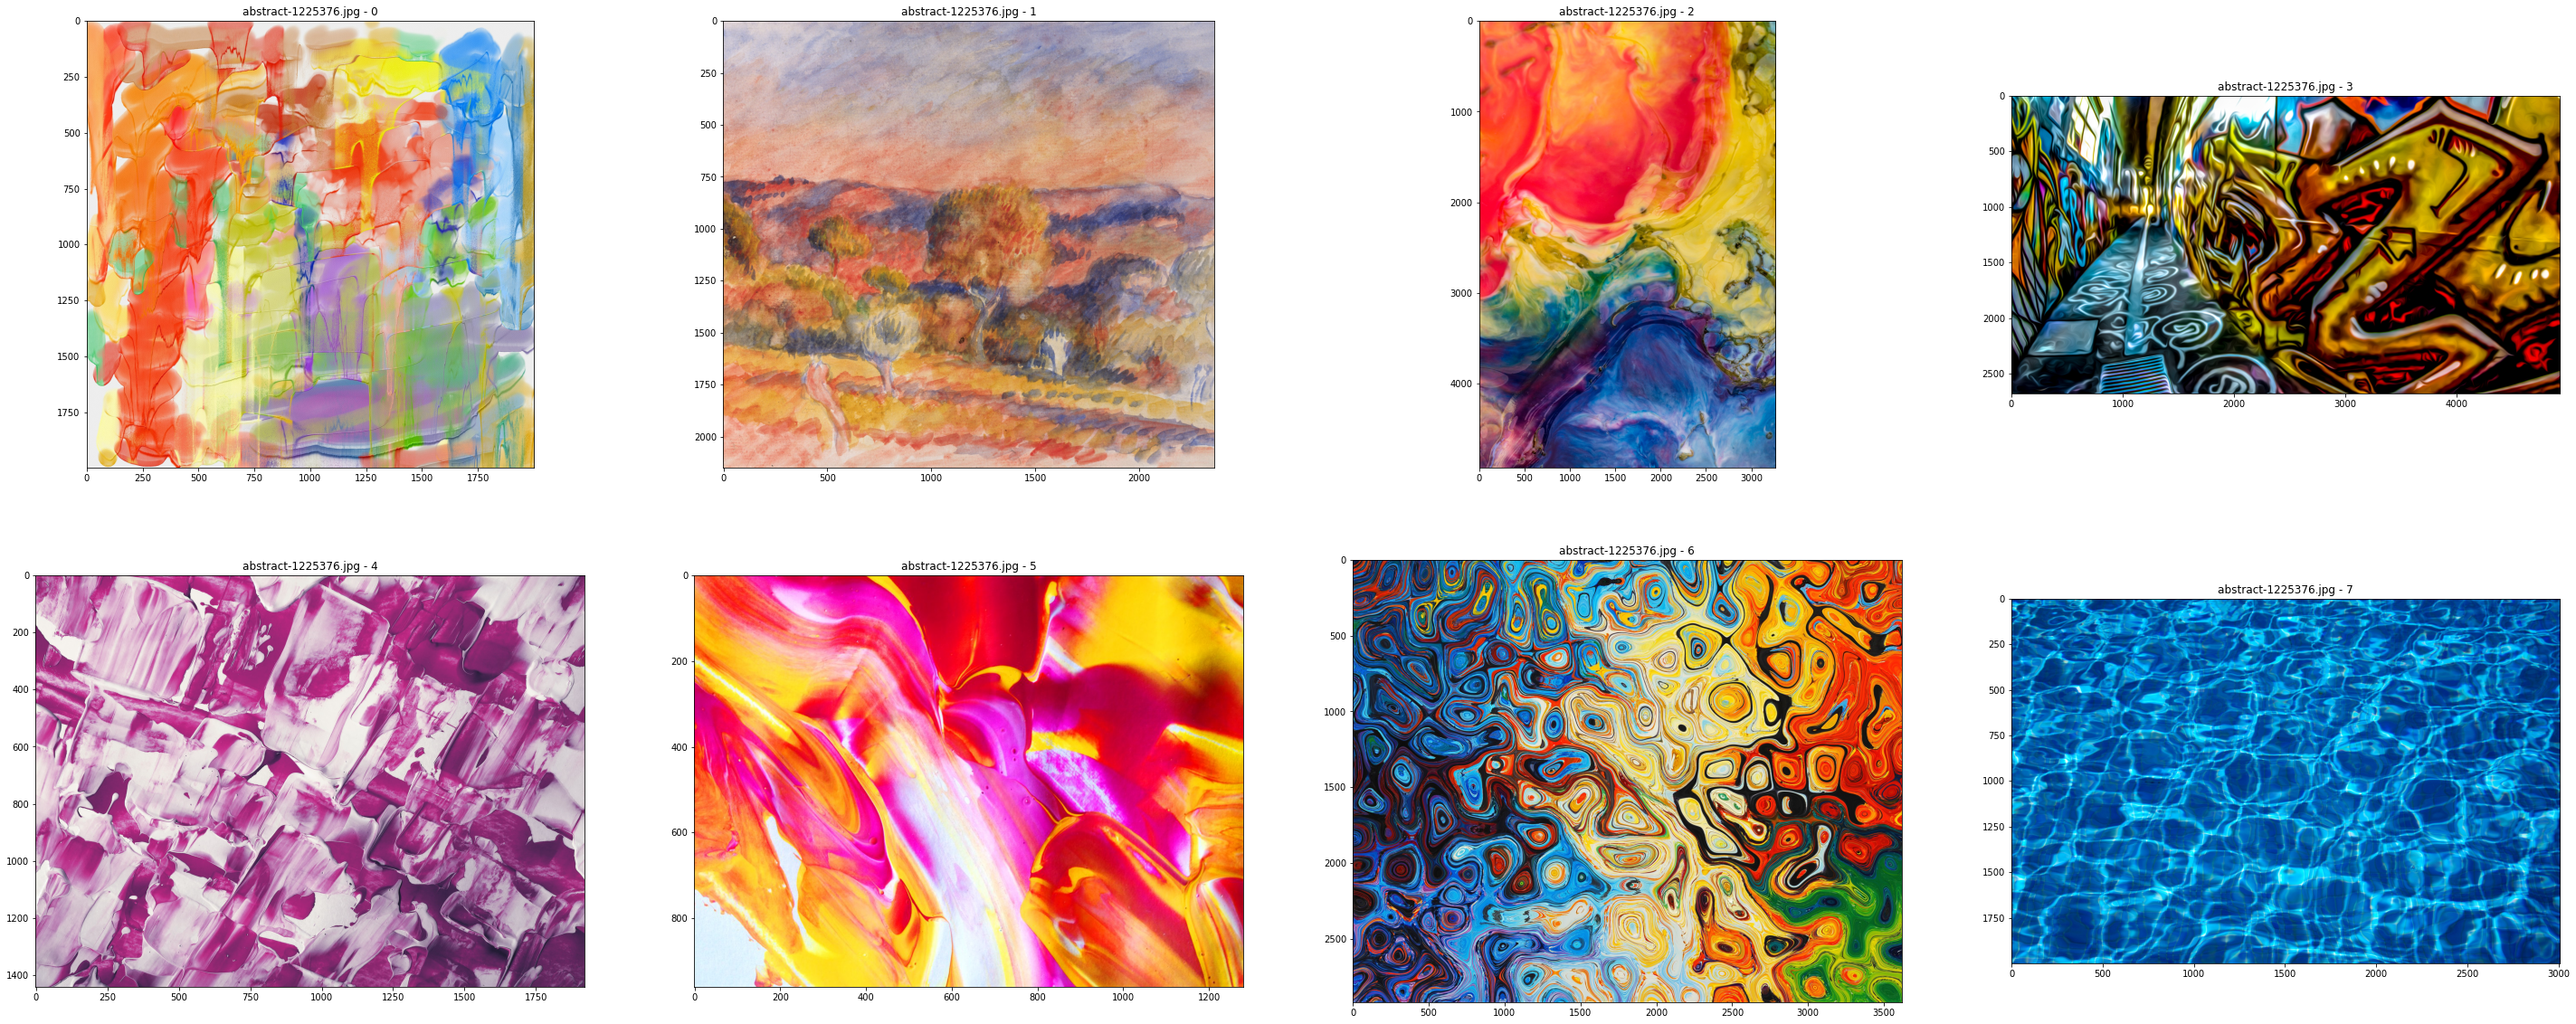

In [ ]:
# Show avaliable styles
fig, ax= plt.subplots(2, int(len(styles)/2), figsize=(50, 20))
i = 0
for i in range(2):
  for j in range(int(len(styles)/2)):
    img = Image.open(image_dir + 'styles/' + styles[int(len(styles)/2) * i+j])
    ax[i][j].imshow(img)
    ax[i][j].set_title(style + f' - {int(len(styles)/2) * i+j}')

In [67]:
style = styles[int(input('Please, select style type. (from 0 to 7): '))]

Please, select style type. (from 0 to 7): 7


Iteration: 50, loss: 6286293.500000
Iteration: 100, loss: 3100099.250000
Iteration: 150, loss: 1324675.875000
Iteration: 50, loss: 1375919616.000000
Iteration: 100, loss: 759246848.000000
Iteration: 150, loss: 403041152.000000


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/module.py:390: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  if param.grad is not None:


Iteration: 50, loss: 1790238976.000000
Iteration: 100, loss: 1492220800.000000
Iteration: 150, loss: 2255892480.000000
Iteration: 50, loss: 11379804.000000
Iteration: 100, loss: 5860937.000000
Iteration: 150, loss: 2742970.250000
Iteration: 50, loss: 2145223936.000000
Iteration: 100, loss: 984900992.000000
Iteration: 150, loss: 466353280.000000
Iteration: 50, loss: 4399704064.000000
Iteration: 100, loss: 3682853888.000000
Iteration: 150, loss: 3652547840.000000
Iteration: 50, loss: 21543048.000000
Iteration: 100, loss: 8529375.000000
Iteration: 150, loss: 4535745.500000
Iteration: 50, loss: 4413147136.000000
Iteration: 100, loss: 1877342208.000000
Iteration: 150, loss: 944467392.000000
Iteration: 50, loss: 5367537152.000000
Iteration: 100, loss: 4312707584.000000
Iteration: 150, loss: 3793058560.000000
Iteration: 50, loss: 9369791.000000
Iteration: 100, loss: 4826503.500000
Iteration: 150, loss: 2478087.500000
Iteration: 50, loss: 1911090304.000000
Iteration: 100, loss: 915552512.00000

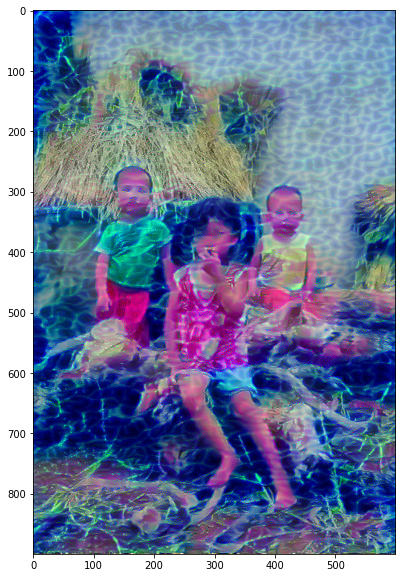

In [68]:
# Style transfering
for c, content in enumerate(contents):
  for i in range(1, 4):
    style_image, content_image, opt_img = img_load(style,  content, [image_dir + 'styles/', image_dir + 'contents/'])
    pth_img = image_dir + f'Converted_imgs/content{c}_{i}.jpg'
    pth_mask = image_dir + f'Converted_imgs/mask{c}_{i}.jpg'
    if i == 1:
      # №1. Without any edges control
      run_transfer(style_image, content_image, opt_img, 
                    1e-3, 1e-3, max_iter = 150, save=True, 
                    path_for_converted = pth_img)
    elif i == 2:
      # 2
      run_transfer(style_image, content_image, opt_img, 
                   1e-3, 1e-1, edge_loss_w = 0.1, pool_k = 2, max_iter = 150,
                   save=True, path_for_converted = pth_img, 
                    path_for_mask= pth_mask)
    elif i == 3:
      # 3
      run_transfer(style_image, content_image, opt_img, 
                    1, 1e-2, edge_loss_w = 1,
                    pool_k = None, max_iter = 150, canny_mode=True,
                    canny = {'gaus_k':5, 'gaus_sigma':1, 
                      'low_threshold':True, 'high_threshold':False, 
                      'part':0.1, 'hyst':True}, save=True, 
                              path_for_converted = pth_img, 
                              path_for_mask= pth_mask)

## Общее описание идеи улучшенного учета контуров
**Какие параметры, и как они подбирались. В каких случаях хорошо, а в каких плохо работает.**

Это была пожалуй самая сложная часть работы. Это первый опыт работы с изображениями, и пришлось действовать по интуиции. Во-первых, потому что не получится просто перебрать всевозможные наборы параметров, их выходит слишком много, в добавок к этому достаочно сложно дискретизировать их. Во-вторых, тут ориентироваться на лос не получится, можно только видеть скорость сходимости, при том, одни модели дают визуально хороший результат при одном наборе параметров, которые уже не выстрелят в другой модели. Действовтать в таком случае пришлось "стохастическим градиентным спуском в ручном режиме". 

Изначально были взяты параметры из статьи. Получанный уровень стилизации был принят за целевой, на нем были видны проблемы размытия границ.

Общий подход к подбору параметров заключался в следующем: Брался какой-нибудь параметр, пробовалось изменить параметр в большую и меньшую стороны, находилось значение некоторой "оптимальной" его величины, локальный максимум, где бы сохранялся стиль и при этом держались контуры на сколько это возможно, потом брался какой-нибудь другой параметр и т.д. Конечно, были параметры, о которых можно было сказать, в какую сторону крутить, чтобы добиться желаемого эффекта. Так, параметр sigma в ядре Гауса отвечает за то, на сколько мелкие детали мы увидим на изображении контуров и т.п. 

 В модели с Собелем и улучшенной модели очень тщательно были сначала изучены маски. В модели с Собелем маски включают в себя слишком много деталей, в связи с чем увеличение числа итераций не дает ощутимых сдвигов уже после ~ 150 - 200 итерации. Единственная доработка в модели собеля, которая дала весомое изменение это использование не отдельно ядер для извлечения вертикальных и горизонтальных линий, а совмещение поэлементно результатов конволюции:
  `sqrt(h_sob_out ** 2 + v_sob_out ** 2 + m)`, где `m` << 1 для предотвращения ошибок вычисления. 
  Результат такого совмещения и использовался в качестве детектора границ. Но такой детектор всё-равно оставлял много незначительных линий, которые влияли на наложение стиля. В этой модели не получилось подобрать так параметры, чтобы и линии сохранить и стиль.

Поэтому был взят алгоритм Canny,  его версия расписанная в статье: `https://habr.com/ru/post/114589/`, некоторые идеи реализации функций для некторых этапов позаимствованы из `https://towardsdatascience.com/implement-canny-edge-detection-from-scratch-with-pytorch-a1cccfa58bed ` и 
`https://tech.unifa-e.com/entry/2020/01/30/100451`. 

Такой подход подразумевал 5 этапов. Причем в реализованном классе есть возможность выключать некоторые этапы. Но по результатам опытов оказалось каждый из этапов важен, так как данный алгоритм позволил добиться того, что теперь не было много незначимых линий: найдены локальные максимумы, и проведена трассировка. Тут возникло однако противоречие: сохранение незначимых  границ не было столь жестким условием как в модели Собеля, стиль накладывался полнее,чем в Собеле. Четко наклыдывалась структура стиля, с сохранением при этом контентных цветов, что радует.

Алгоритм на первом шаге делает свертку ядром Гаусса (5х5 давало результат лучше чем 3х3). Вторым делает свертку Собеля на изображении с предыдущего этапа.

На этапе подавления немаксимумов оставленно ядро 3х3, чтобы не добавлять шумов, лишних линий. Была попытка добавить точки, которые были близко к локальным максимумам, но это давало слишком зашумленным изображение углов.

После, в предложенных реализациях проводилась нормировка в диапазон от 0 до 1. И в целом на выходе выдавалась маска из 0 и 1. Но это плохо работало, так как в нашу функцию ошибки такие значения вносили маленький вклад, и тонкие линии не срабатывали, не удерживали наши границы. Увеличение веса перед loss_edge не давало значимых результатах.

Подбор параметров трассировки, пожалуй, этап самый длительный был. Здесь стал вопрос универсальности порогов для разных изображений (от нормаировки мы отказались). Было два варианта: использзовать в качестве high_treshold разницу между максимальным и средним значением, а low_treshhold взять как долю от high_treshhold или (вариант на котором остановилась) low_treshhold = part * max,
high_treshhold = (1 - part) * max. Но на самом деле, high_treshhold влияет, если мы используем режим без гистерезиса. Основной параметр тут low_treshhold. Параметр part изначально настраивался так, чтобы маска сохраняла максимально основные линии без лишних, но как было сказано выше, этого не потребовалось. Этот параметр примерно оптимален на уровне от 1 до 2 для разных изображений, а так как незначительные границы нам теперь не мешают, было взять 0.1. Было решено по этой же причине отказаться от гистерезиса, который направлен на подавление таких мелких линий. При этом, конечно, не удалось обвести по контуру деревья или платья девушек игнорируя мелкие листочки или рисунок на ткани. 

Для сравнимости результатов все изображения проходили 150 итераций, под этот параметр в том числе были подобраны веса при функциях ошибок, чтобы стиль успел наложиться.

Было на самом деле много нюансов, которые возникали в ходе работы, и в отношении которых приходилось что-то выдумывать и решать, но сейчас все и не упомнить. Осовные приведены выше.

## Визуализация выбранного стиля

## Сравнение 17x4: контент, стилизация 1м, 2м и 3м методами 
Для каждого из 17 контентов [отсюда](https://yadi.sk/d/Yn-9mk4NAsSAKw?w=1). 

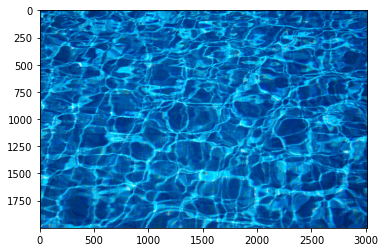

In [69]:
s = Image.open(image_dir + 'styles/' + style)
imshow(s)
plt.show()

In [2]:
# out of images
rows = 17
cols = 4
fig, ax= plt.subplots(rows, cols, figsize=(40, 100))
i = 0
for i in range(rows):
  for j in range(cols):
    if j%4==0:
      img = Image.open(image_dir + 'contents/' + contents[i])
      ax[i][j].set_title("Original") 
      ax[i][j].imshow(img)
    else:
      subplot_title=("Method "+str(j%4))
      ax[i][j].set_title(subplot_title)
      img = Image.open(image_dir + f'Converted_imgs/content{i}_{j}.jpg')
      ax[i][j].imshow(img)

## Сравнение 17x3: контент, контуры станадртным и модифицированным методом 

In [1]:
# out of images
rows = 17
cols = 3
fig, ax= plt.subplots(rows, cols, figsize=(40, 100))
i = 0
for i in range(rows):
  for j in range(cols):
    if j%3==0:
      img = Image.open(image_dir + 'contents/' + contents[i])
      ax[i][j].set_title("Original") 
      ax[i][j].imshow(img)
    else:
      ax[i][j].set_title("Method "+str(j%3))
      img = Image.open(image_dir + f'Converted_imgs/mask{i}_{j+1}.jpg')
      ax[i][j].imshow(img)

## Ваши идеи по [alterdraw.com](https://alterdraw.com) (по желанию)
- комментарии по работе алгоритма, идеи улучшения (это нестандартный алгоритм, стандартный запатентован)
- улучшение дизайна, дополнительные фичи, опечатки и обнаруженные баги (все-таки алгоритм - это меньше 5% от инфраструктуры всего сервиса)
- идеи площадок, где можно было бы продвигать сервис